## Meteo Bakery: Exploratory Data Analysis - Sales

### import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### load data

In [2]:
sales = pd.read_excel('data/neueFische_Umsaetze_Baeckerei.xlsx')

### EDA and Feature Engineering

In [4]:
# get basic information on datatypes and missings
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52895 entries, 0 to 52894
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Branch               52895 non-null  int64         
 1   Date                 52895 non-null  datetime64[ns]
 2   PredictionGroupName  52895 non-null  object        
 3   SoldTurnver          52892 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.6+ MB


In [5]:
# generate location column based on branch
# Filiale 1: U-Bahn
# Filiale 2: Innenstadt
# Filiale 3: Bahnhof

sales['Location'] = sales.Branch.apply(lambda x: 'Metro' if x==1 else 'Center' if x==2 else 'Train_Station')
sales.head()

,Branch,Date,PredictionGroupName,SoldTurnver,Location
0,1,2012-01-01,Mischbrote,134.735759,Metro
1,1,2012-01-01,Weizenbrötchen,150.104897,Metro
2,1,2012-01-01,klassischer Kuchen,322.635866,Metro
3,1,2012-01-01,handliches Gebäck,1047.327119,Metro
4,1,2012-01-01,herzhafter Snack,816.663466,Metro


There are three missing values in the sales data ('SoldTurnver').

In [6]:
# extract time features from Date column
sales['year'] = sales.Date.dt.year
sales['month'] = sales.Date.dt.month
sales['week'] = sales.Date.dt.week
sales['day_of_month'] = sales.Date.dt.day
sales['day_of_week'] = sales.Date.dt.dayofweek

sales.head()

/var/folders/dn/n_6mm8pj72738s4ygylk0sgm0000gn/T/ipykernel_10209/121627390.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  sales['week'] = sales.Date.dt.week


,Branch,Date,PredictionGroupName,SoldTurnver,Location,year,month,week,day_of_month,day_of_week
0,1,2012-01-01,Mischbrote,134.735759,Metro,2012,1,52,1,6
1,1,2012-01-01,Weizenbrötchen,150.104897,Metro,2012,1,52,1,6
2,1,2012-01-01,klassischer Kuchen,322.635866,Metro,2012,1,52,1,6
3,1,2012-01-01,handliches Gebäck,1047.327119,Metro,2012,1,52,1,6
4,1,2012-01-01,herzhafter Snack,816.663466,Metro,2012,1,52,1,6


In [7]:
# extract product categories
products = sales.PredictionGroupName.unique().tolist()

# insert category 'all' for all products
products.insert(0, 'All')
products

['All',
 'Mischbrote',
 'Weizenbrötchen',
 'klassischer Kuchen',
 'handliches Gebäck',
 'herzhafter Snack']

### Sales across time

In [8]:
# define utility function for plotting sales data
def plot_sales(product, year_range, title):
    """Plot sales data for bakery branches and over specified time frame in years. Data can be plotted for all or specified products

    Args:
        product (str): Product name
        year_range (list): Start and end year of the plotting time frame
        title (str): Plot title
    """
    if product=='All':
        # average sales across products for each branch and date
        mean_sales = sales.groupby(['Location', 'Date']).mean().reset_index()
        
        sns.lineplot(data=mean_sales[(mean_sales.Date.dt.year.isin(range(year_range[0], year_range[1])))], 
                x='Date', y='SoldTurnver', hue='Location', palette={'Metro': 'red', 'Center': 'blue', 'Train_Station': 'green'}, alpha=0.8)
    else:
        sns.lineplot(data=sales[(sales.PredictionGroupName==product) & (sales.Date.dt.year.isin(range(year_range[0], year_range[1])))], 
                x='Date', y='SoldTurnver', hue='Location', palette={'Metro': 'red', 'Center': 'blue', 'Train_Station': 'green'}, alpha=0.8)
    
    plt.ylabel('Turnover', fontsize=12)
    plt.xlabel('Year', fontsize=12)
    plt.xticks(rotation = 45)
    plt.legend(loc='upper right', fontsize=10)
    plt.title(title)

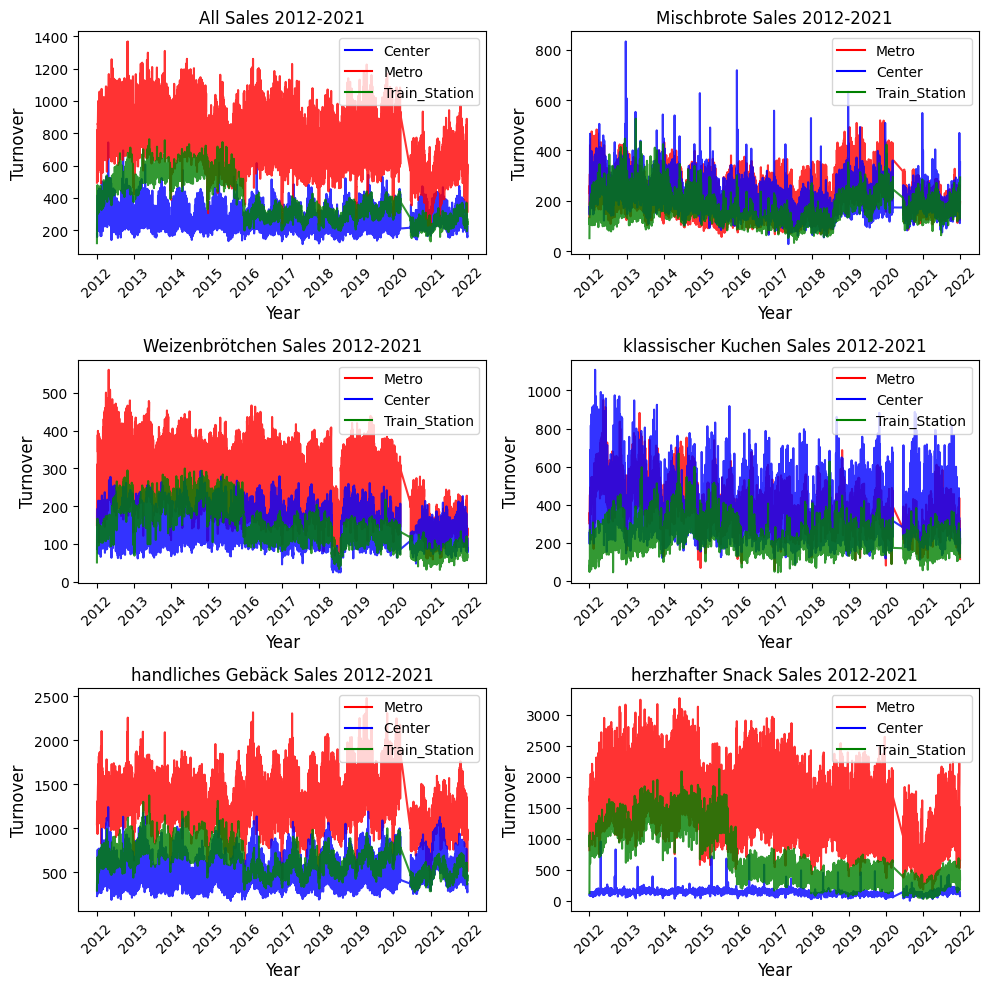

In [9]:
fig = plt.figure(figsize=(10, 10))

j = 1
for i in range(len(products)):
    subplot = fig.add_subplot(3, 2, j)
    plot_sales(products[i], [2012, 2022], f'{products[i]} Sales 2012-2021')
    j += 1
plt.tight_layout()
plt.show()

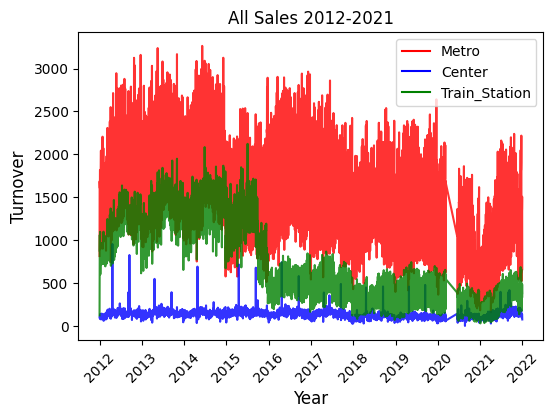

In [10]:
plt.figure(figsize=(6, 4))
plot_sales(products[i], [2012, 2022], f'{products[0]} Sales 2012-2021')

In [11]:
# aggregate sales over month per year
monthly_sales = sales.groupby(['Location', 'PredictionGroupName', 'year', 'month'])['SoldTurnver'].mean().reset_index()
monthly_sales.head()

,Location,PredictionGroupName,year,month,SoldTurnver
0,Center,Mischbrote,2012,1,261.460826
1,Center,Mischbrote,2012,2,243.884163
2,Center,Mischbrote,2012,3,286.331082
3,Center,Mischbrote,2012,4,297.887375
4,Center,Mischbrote,2012,5,296.082810


In [12]:
monthly_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1770 entries, 0 to 1769
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Location             1770 non-null   object 
 1   PredictionGroupName  1770 non-null   object 
 2   year                 1770 non-null   int64  
 3   month                1770 non-null   int64  
 4   SoldTurnver          1770 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 69.3+ KB


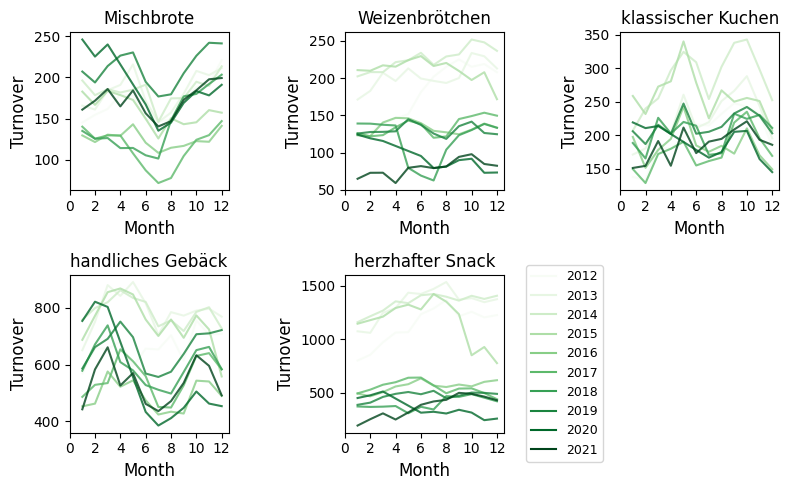

In [13]:
fig = plt.figure(figsize=(8, 5))

for i in range(1, len(products)):
    subplot = fig.add_subplot(2, 3, i)
    sns.lineplot(data=monthly_sales[(monthly_sales.Location=='Train_Station') & (monthly_sales.PredictionGroupName == products[i])], 
                x='month', y='SoldTurnver', hue='year', alpha=0.8,  palette='Greens', legend='full')
    plt.ylabel('Turnover', fontsize=12)
    plt.xlabel('Month', fontsize=12)
    plt.xticks(ticks=np.arange(0, 13, 2))
    plt.title(products[i])
    if i==5:
        plt.legend(bbox_to_anchor=(1.1, 1.1), loc='upper left', fontsize=9)
    else:
        plt.legend('', frameon=False)
plt.tight_layout()
plt.show()

### Overall sales differences between branches and products

In [14]:
sales.head()

,Branch,Date,PredictionGroupName,SoldTurnver,Location,year,month,week,day_of_month,day_of_week
0,1,2012-01-01,Mischbrote,134.735759,Metro,2012,1,52,1,6
1,1,2012-01-01,Weizenbrötchen,150.104897,Metro,2012,1,52,1,6
2,1,2012-01-01,klassischer Kuchen,322.635866,Metro,2012,1,52,1,6
3,1,2012-01-01,handliches Gebäck,1047.327119,Metro,2012,1,52,1,6
4,1,2012-01-01,herzhafter Snack,816.663466,Metro,2012,1,52,1,6


In [15]:
# define utility function for plotting overall sales data by branch
def plot_sales_by_branch(product):
    """Plot sales data by bakery branches for defined product.

    Args:
        product (str): Product name
    """
    sns.boxplot(data=sales[sales.PredictionGroupName==product], 
                        x='Location', y='SoldTurnver', saturation=0.5, 
                        palette={'Metro': 'red', 'Center': 'blue', 'Train_Station': 'green'})
    plt.ylabel('Turnover', fontsize=12)
    plt.xticks(rotation = 45)
    plt.title(product)

# define utility function for plotting overall sales data by product
def plot_sales_by_product(location):
    """Plot sales data by bakery branches for defined product.

    Args:
        branch (str): Branch location
    """
    sns.boxplot(data=sales[sales.Location==location], 
                        x='PredictionGroupName', y='SoldTurnver', saturation=0.5, 
                        color='red' if location=='Metro' else 'blue' if location=='Center' else 'green')
    plt.ylabel('Turnover', fontsize=12)
    plt.xlabel('')
    plt.xticks(rotation = 45, ha='right')
    plt.title(location)

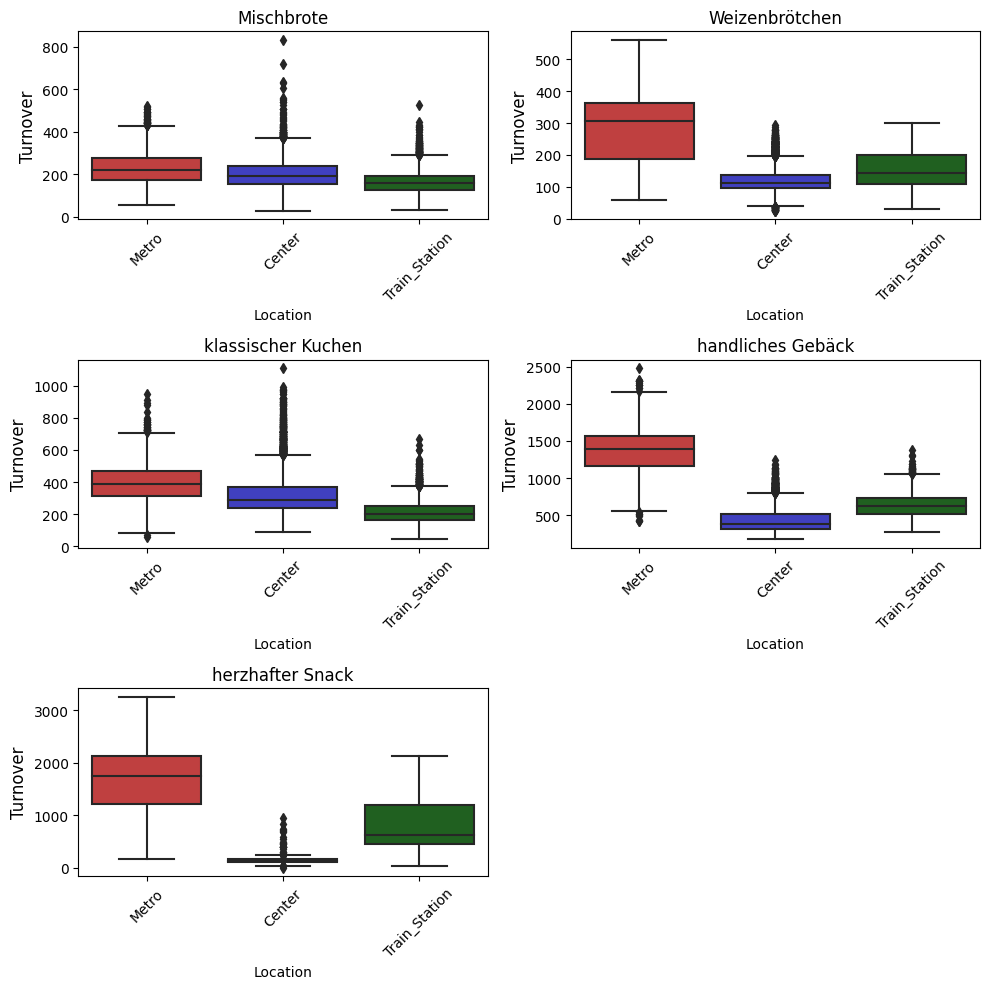

In [16]:
fig = plt.figure(figsize=(10, 10))

j = 1
for i in range(1, len(products)):
    subplot = fig.add_subplot(3, 2, j)
    plot_sales_by_branch(products[i])
    j += 1
plt.tight_layout()
plt.show()

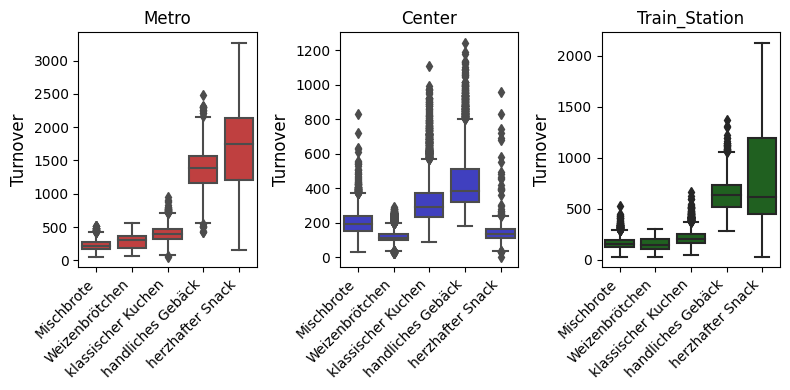

In [17]:
fig = plt.figure(figsize=(8, 4))

for i, x in enumerate(sales.Location.unique().tolist()):
    subplot = fig.add_subplot(1, 3, i+1)
    plot_sales_by_product(x)
plt.tight_layout()
plt.show()

### Sales differences between branches by month, day of the month and day of the week

In [31]:
def plot_sales_by_period(product, period, ylim, step):
    """Plot product sales data as boxplot grouped by a specified time period for bakery branches.

    Args:
        product (str): Product name
        period (str): Time period to group by ('day_of_week', 'month', 'year')
        title (str): Plot title
        ylim (int): Upper y-axis limit
        step (int): Step size for y-axis ticks
    """

    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10, 4))
    plt.suptitle(f'{product} sales by {period}', fontsize=14)

    ax1 = sns.boxplot(data=sales[(sales.PredictionGroupName==product) & (sales.Branch == 1)], 
                        x=period, y='SoldTurnver', color='red', saturation=0.5, ax=ax1)
    ax1.set_ylabel('Turnover', fontsize=12)
    ax1.set_yticks(ticks=np.arange(0,ylim+1, step))
    ax1.set_xlabel(period)
    ax1.set_title('Metro')

    ax2 = sns.boxplot(data=sales[(sales.PredictionGroupName==product) & (sales.Branch == 2)], 
                        x=period, y='SoldTurnver', color='blue', saturation=0.5, ax=ax2)
    ax2.set_ylabel('Turnover', fontsize=12)
    ax2.set_yticks(ticks=np.arange(0,ylim+1, step))
    ax2.set_xlabel(period)
    ax2.set_title('Center')

    ax3 = sns.boxplot(data=sales[(sales.PredictionGroupName==product) & (sales.Branch == 3)], 
                        x=period, y='SoldTurnver', color='green', saturation=0.5, ax=ax3)
    ax3.set_ylabel('Turnover', fontsize=12)
    ax3.set_yticks(ticks=np.arange(0,ylim+1, step))
    ax3.set_xlabel(period)
    ax3.set_title('Train_Station')
    
    plt.tight_layout()
    plt.show()


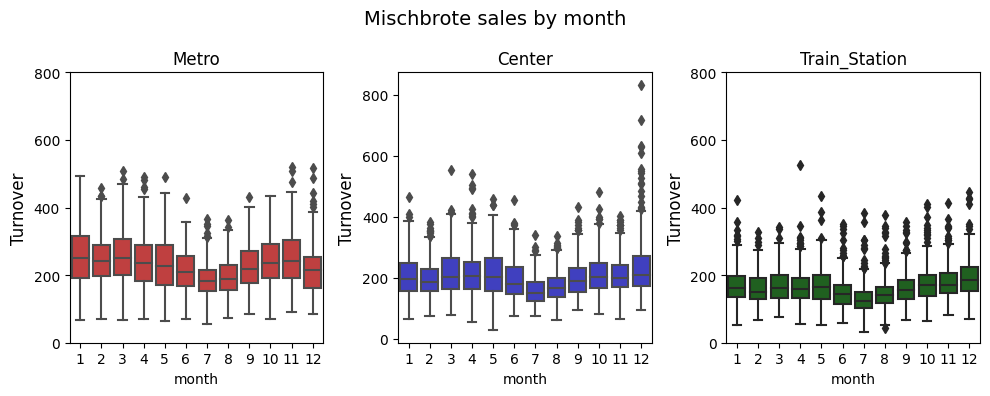

In [32]:
plot_sales_by_period(products[1], 'month', 800, 200)

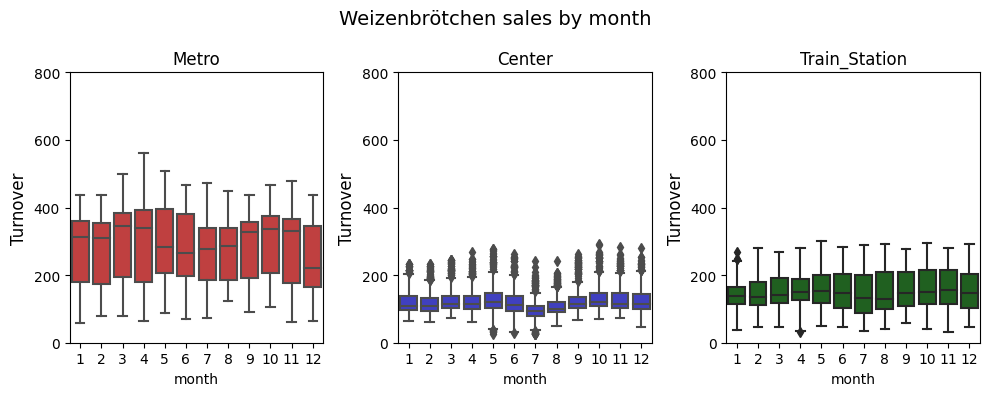

In [33]:
plot_sales_by_period(products[2], 'month', 800, 200)

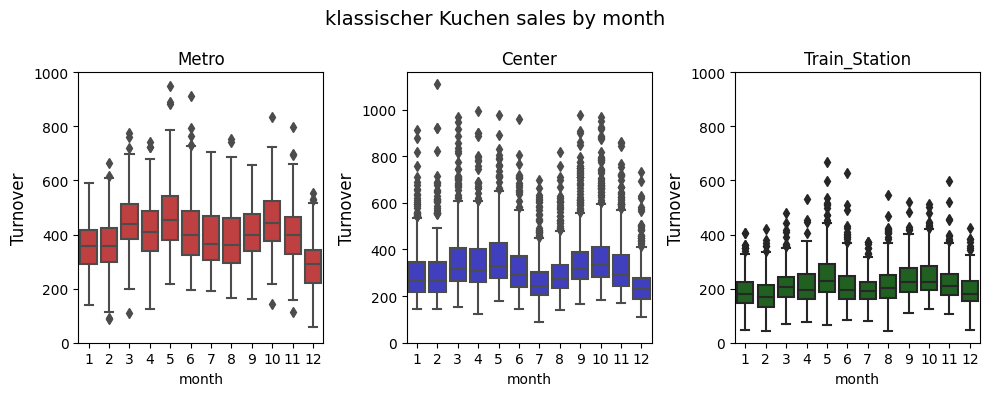

In [34]:
plot_sales_by_period(products[3], 'month', 1000, 200)

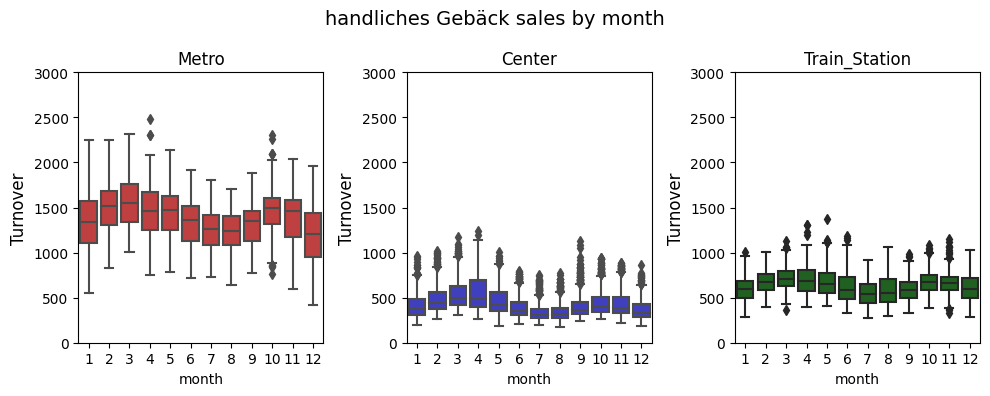

In [35]:
plot_sales_by_period(products[4], 'month', 3000, 500)

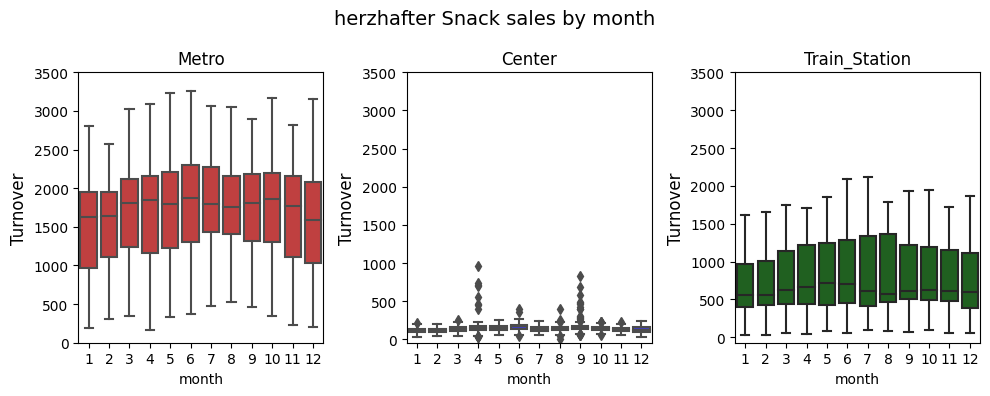

In [36]:
plot_sales_by_period(products[5], 'month', 3500, 500)

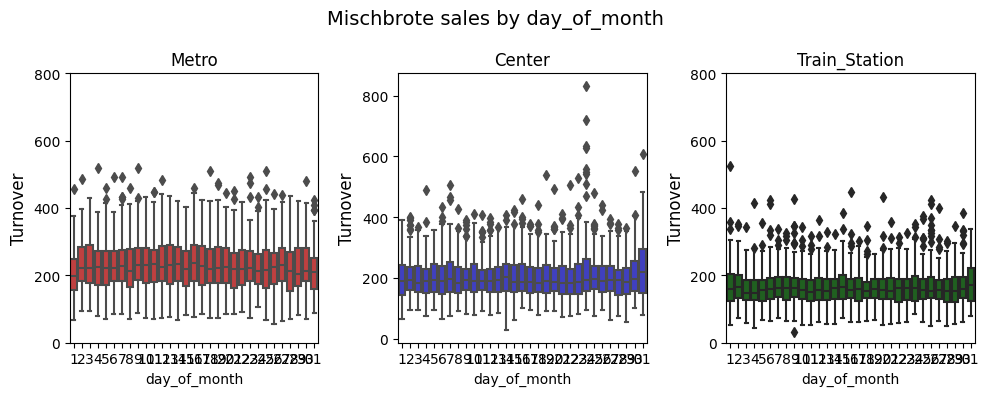

In [37]:
plot_sales_by_period(products[1], 'day_of_month', 800, 200)

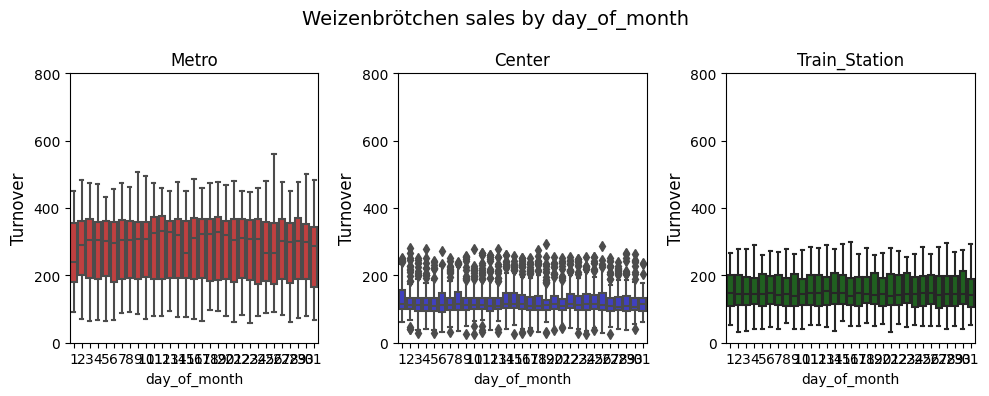

In [38]:
plot_sales_by_period(products[2], 'day_of_month', 800, 200)

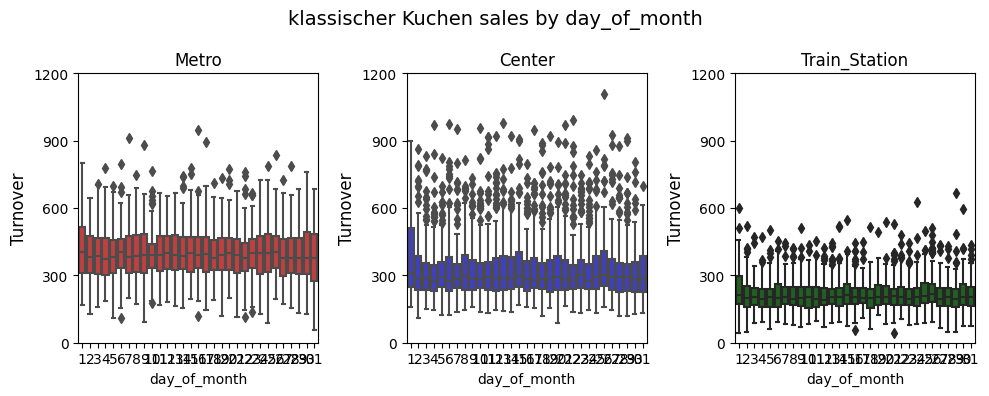

In [39]:
plot_sales_by_period(products[3], 'day_of_month', 1200, 300)

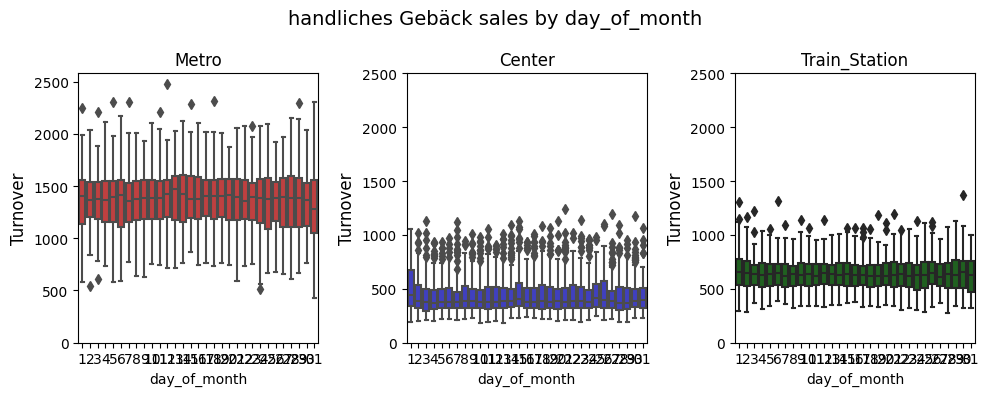

In [40]:
plot_sales_by_period(products[4], 'day_of_month', 2500, 500)

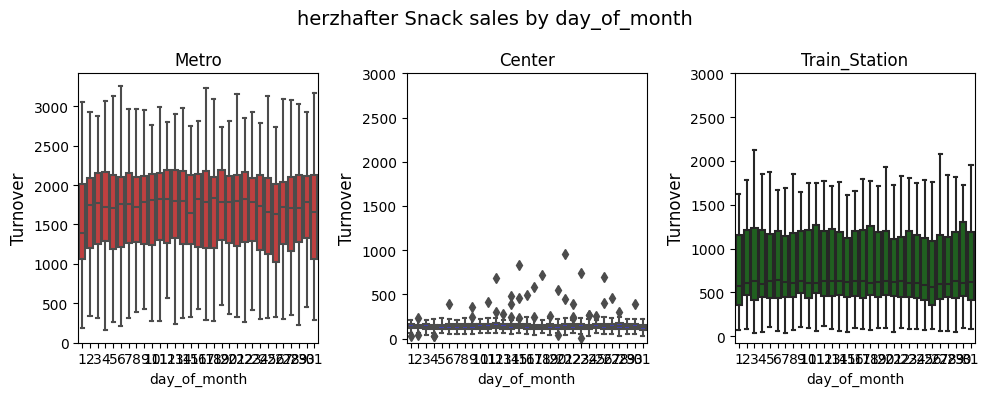

In [41]:
plot_sales_by_period(products[5], 'day_of_month', 3000, 500)

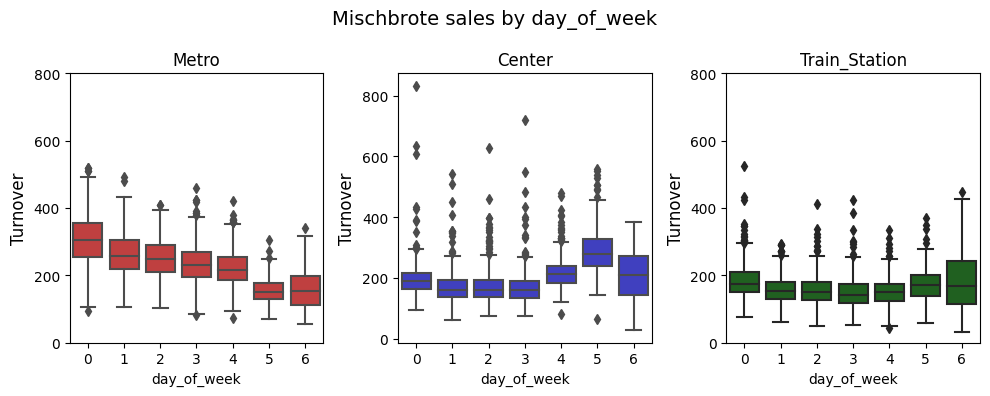

In [42]:
plot_sales_by_period(products[1], 'day_of_week', 800, 200)

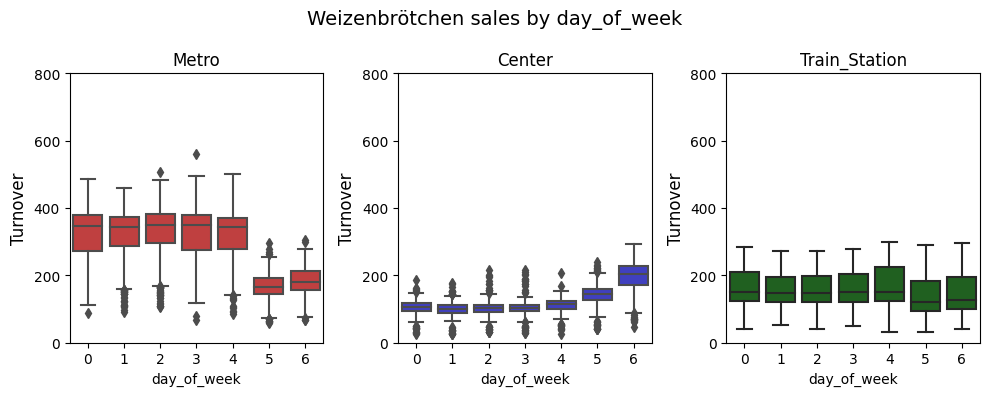

In [43]:
plot_sales_by_period(products[2], 'day_of_week', 800, 200)

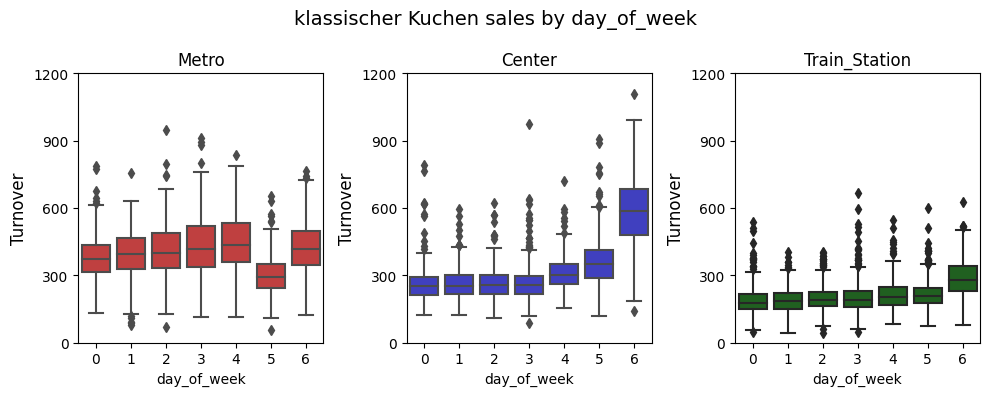

In [44]:
plot_sales_by_period(products[3], 'day_of_week', 1200, 300)

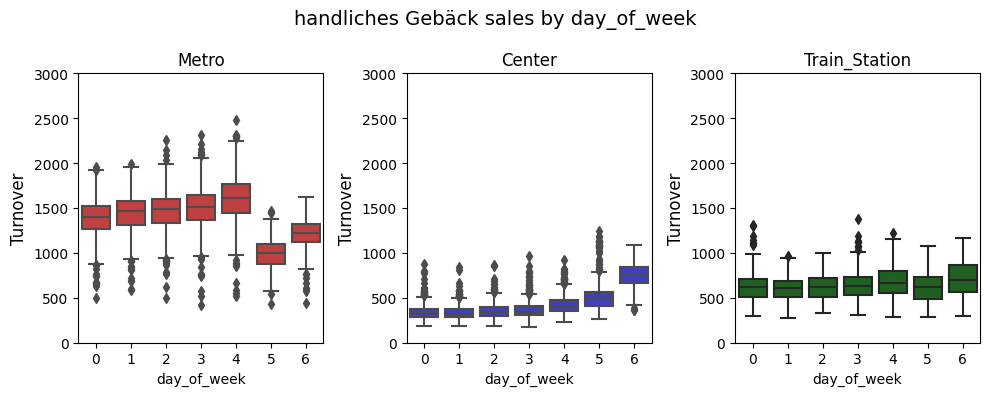

In [45]:
plot_sales_by_period(products[4], 'day_of_week', 3000, 500)

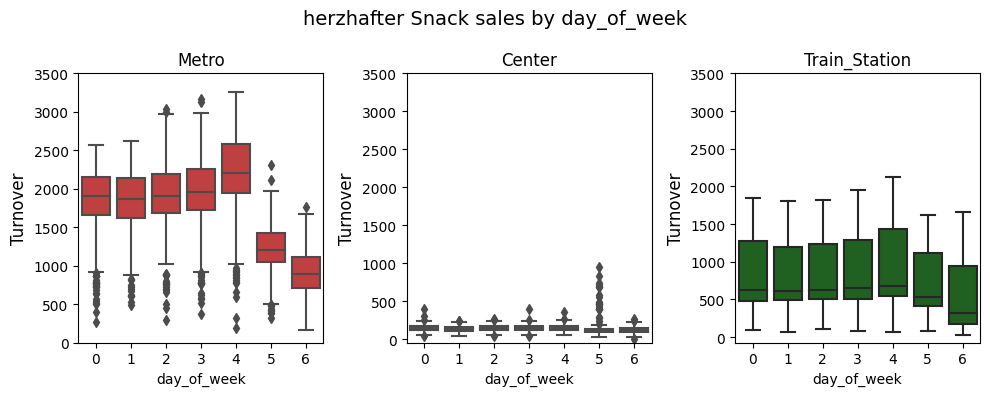

In [46]:
plot_sales_by_period(products[5], 'day_of_week', 3500, 500)